# Task 2 : What’s inside the box?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [2]:
# Input image
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/img/L3_work_Task2.jpg?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) 

In [3]:
def HistogramComparison(img):
    bgr_planes = cv2.split(img)
    histSize = 256
    histRange = (0, 256) # the upper boundary is exclusive
    accumulate = False
    b_hist = cv2.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
    g_hist = cv2.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
    r_hist = cv2.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
    hist_w = 512
    hist_h = 400
    bin_w = int(round( hist_w/histSize ))
    histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
    cv2.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    cv2.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
    for i in range(1, histSize):
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(b_hist[i]) ),
                ( 255, 0, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(g_hist[i]) ),
                ( 0, 255, 0), thickness=2)
        cv2.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
                ( bin_w*(i), hist_h - int(r_hist[i]) ),
                ( 0, 0, 255), thickness=2)
    return histImage

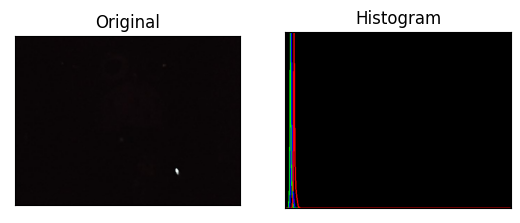

In [4]:
histImage = HistogramComparison(img)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB))
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
def GammaTransform(img, gamma):
    # Apply gamma transform.
    gamma_transformed = np.array(255*(img/255)**gamma, dtype = 'uint8')
    return gamma_transformed

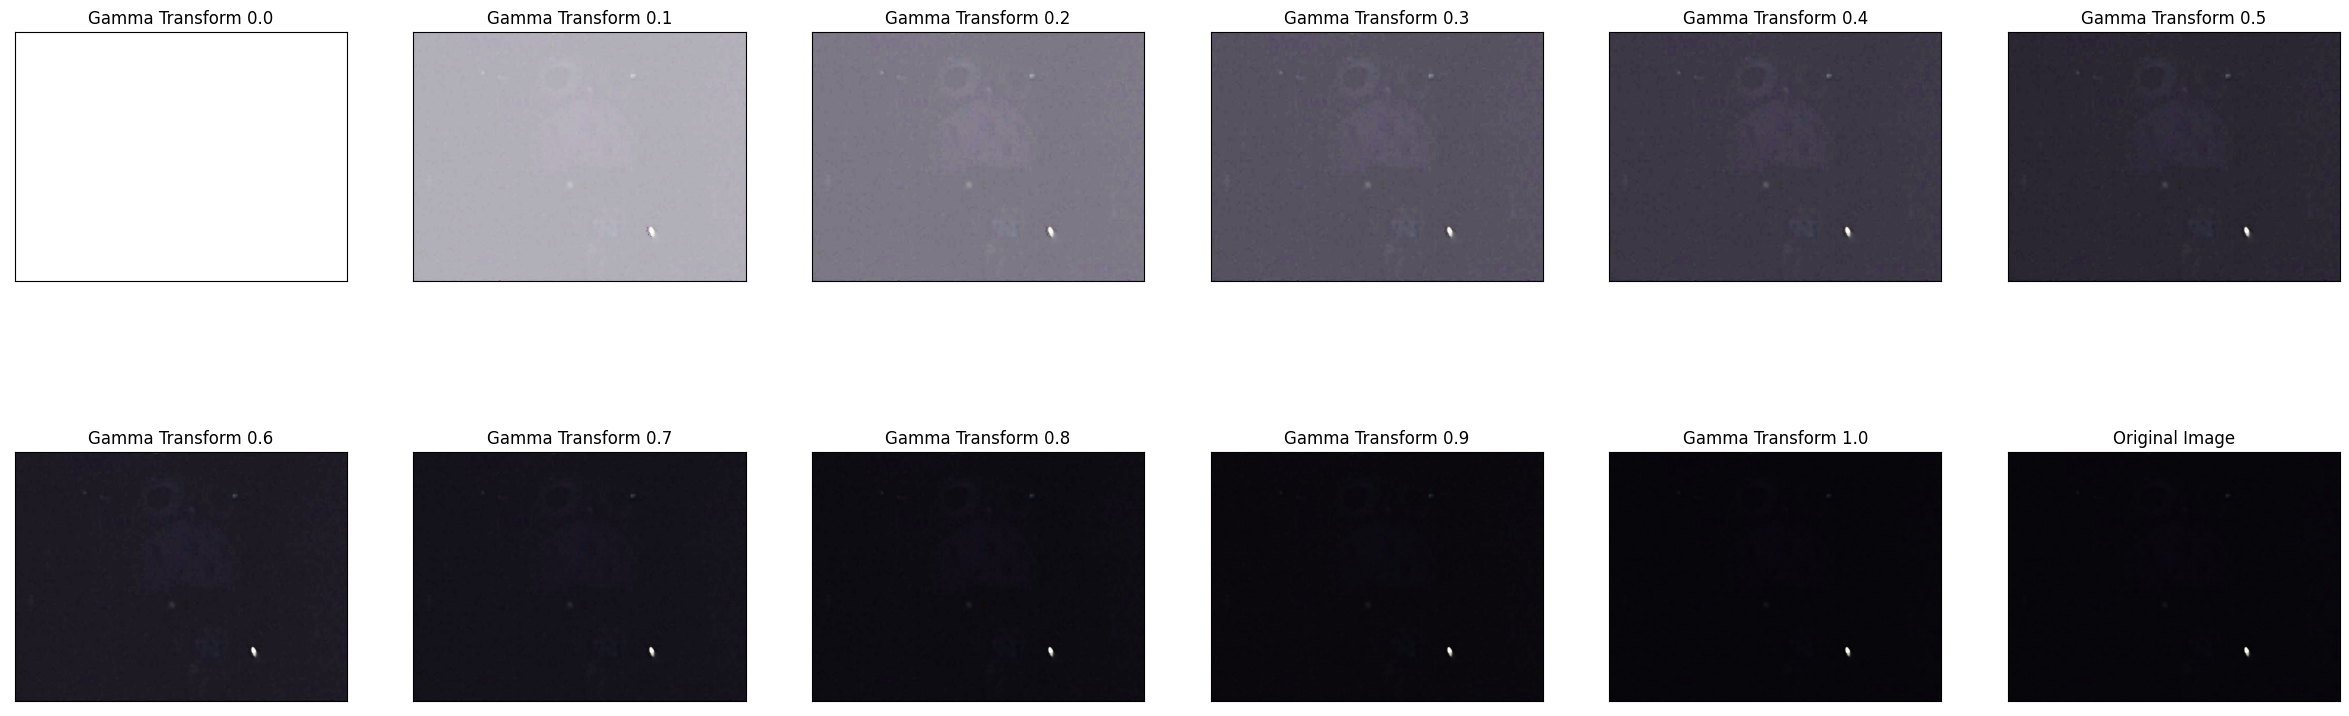

In [6]:
gamma = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
gammaplot = []
plt.figure(figsize=(30, 10))
for i in range(len(gamma)):
    gammaplot.append(GammaTransform(img, gamma[i]))
    plt.subplot(2,6,i+1), plt.imshow(gammaplot[i], cmap = 'gray')
    plt.title('Gamma Transform '+str(gamma[i])), plt.xticks([]), plt.yticks([])
plt.subplot(2,6,12), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
imggamma = GammaTransform(img, 0.3)

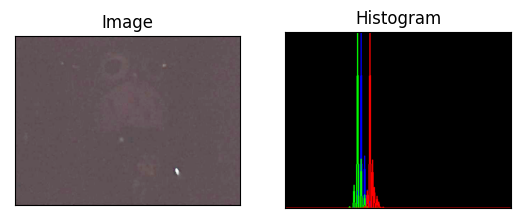

In [8]:
histImage = HistogramComparison(imggamma)

plt.subplot(121), plt.imshow(cv2.cvtColor(imggamma, cv2.COLOR_BGR2RGB))
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB))
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

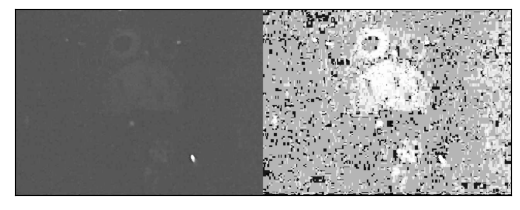

In [9]:
imgHis = cv2.cvtColor(imggamma, cv2.COLOR_BGR2GRAY)

equ = cv2.equalizeHist(imgHis)
  
# stacking images side-by-side
res = np.hstack((imgHis, equ))

# plotting the images
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
def ArithmeticTransform(img1, img2 , operation):
    # img1 is the input image
    # img2 is the input image
    # operation is the operation to be performed
    if operation == 'and':
        imgOut = cv2.bitwise_and(img1, img2)
    elif operation == 'or':
        imgOut = cv2.bitwise_or(img1, img2)
    elif operation == 'xor':
        imgOut = cv2.bitwise_xor(img1, img2)
    elif operation == 'not':
        imgOut = cv2.bitwise_not(img1)
    imgOut = np.clip(imgOut, 0, 255)
    imgOut = imgOut.astype(np.uint8)
    return imgOut

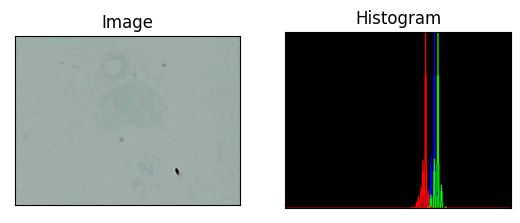

In [11]:
imgnot = ArithmeticTransform(imggamma, imggamma, 'not')

histImage = HistogramComparison(imgnot)

plt.subplot(121), plt.imshow(cv2.cvtColor(imgnot, cv2.COLOR_BGR2RGB))
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(histImage, cv2.COLOR_BGR2RGB))
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
def BitPlaneSlicing(img, n):
    # Apply bit plane slicing.
    bit_plane_sliced = np.array(img, dtype = np.uint8)
    # Shift the bits of the image to the right by n-1.
    bit_plane_sliced = np.vectorize(lambda x: x if (x & (1 << n)) else 0)(bit_plane_sliced)
    return bit_plane_sliced

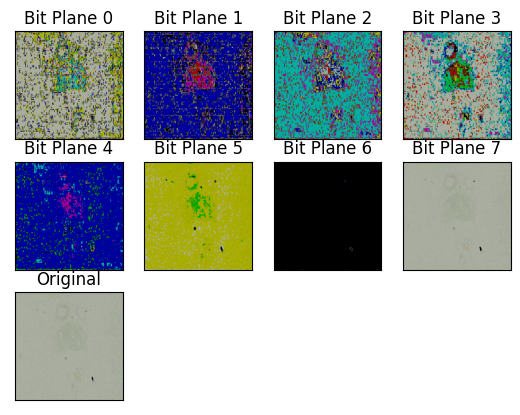

In [13]:
imgbit = cv2.resize(imgnot, (256, 256), interpolation=cv2.INTER_LINEAR)

for i in range(8):
    imgbitn = BitPlaneSlicing(imgbit, i)
    plt.subplot(3,4,i+1), plt.imshow(imgbitn, cmap = 'gray')
    plt.title('Bit Plane '+str(i)), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,9), plt.imshow(imgbit, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

## **Final Result**

มันคือภาพของ ตัวการ์ตูนเป็ด

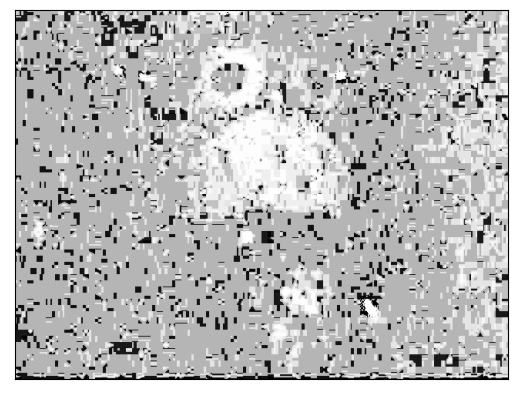

In [14]:
# plotting the images
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()